# Import Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:


# Define the path
data_path = '/content/drive/MyDrive/weatherStation/daily'



# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define column name configurations
column_configurations = {
    'config1': [
        'Time', 'Wind Dir', 'Wind Spd', 'Wind Gust', 'Hum In', 'Humidity', 'Temp In', 'Temp', 'Raw Barom',
        'UV', 'Solar', 'Dew Point', 'DailyRain', 'RainRate'
    ],
    'config2': [
        'Time', 'Wind Dir', 'Wind Spd', 'Hum In', 'Humidity', 'Temp In', 'Temp', 'Raw Barom', 'Temp Ch 1',
        'Hum Ch 1', 'Temp Ch 2', 'Hum Ch 2', 'UV', 'Solar', 'Dew Point', 'RainRate'
    ],
    'config3': [
        'Time', 'Wind Dir', 'Wind Spd', 'Wind Gust', 'Hum In', 'Humidity', 'Temp In', 'Temp', 'Raw Barom',
        'UV', 'Solar', 'Dew Point', 'DailyRain', 'RainRate'
    ],
    'config4': [
        'Time', 'Wind Dir', 'Wind Spd', 'Hum In', 'Humidity', 'Temp In', 'Temp', 'Raw Barom', 'UV', 'Solar',
        'Dew Point', 'DailyRain', 'RainRate'
    ]
}

# Initialize an empty list to store all dataframes
dfs = []

# Iterate through each file in the directory
for filename in os.listdir(data_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_path, filename)

        try:
            # Read the first line to get the date
            with open(file_path, 'r', encoding='latin1') as f:
                first_line = f.readline().strip()
                # Skip the second line containing units
                f.readline()

            # Extract the date from the first line
            try:
                file_date_from_line = pd.to_datetime(first_line, format='%d/%m/%y').date()
            except ValueError:
                logging.warning(f"Date format in file '{filename}' is not recognized. Skipping.")
                continue

            # Read the remaining data into a DataFrame with a placeholder for column names
            df = pd.read_csv(file_path, delimiter='\s+', skiprows=3, encoding='latin1', header=None, on_bad_lines='skip')

            # Check which column configuration matches the DataFrame
            for config_name, columns in column_configurations.items():
                if df.shape[1] == len(columns):
                    df.columns = columns
                    df['Date'] = file_date_from_line
                    dfs.append(df)
                    logging.info(f"File '{filename}' processed with column configuration '{config_name}'.")
                    break
            else:
                logging.warning(f"File '{filename}' does not match any known column configuration. Skipping.")

        except (UnicodeDecodeError, pd.errors.EmptyDataError, pd.errors.ParserError, ValueError) as e:
            logging.error(f"Could not read {file_path}: {e}")

# Concatenate all dataframes into a single dataframe, ignoring empty or all-NA entries
if dfs:
    weather_data = pd.concat(dfs, ignore_index=True)
    logging.info(f"Successfully concatenated data into a single DataFrame with {weather_data.shape[0]} rows.")
else:
    logging.warning("No dataframes to concatenate.")


ERROR:root:Could not read /content/drive/MyDrive/weatherStation/daily/120825.txt: No columns to parse from file


In [ ]:
# weather_data.to_csv('/content/drive/MyDrive/weatherStation/weather_data.csv')

In [ ]:
weather_data = pd.read_csv('/content/drive/MyDrive/weatherStation/weather_data.csv')

<ipython-input-8-fc335abaf919>:1: DtypeWarning: Columns (2,3,5,6,7,8,9,10,11,12,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data = pd.read_csv('/content/drive/MyDrive/weatherStation/weather_data.csv')


In [ ]:
weather_data

,Unnamed: 0,Time,Wind Dir,Wind Spd,Wind Gust,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,DailyRain,RainRate,Date,Temp Ch 1,Hum Ch 1,Temp Ch 2,Hum Ch 2
0,0,0:00,283.0,3.2,14.5,57.0,84.0,13.9,9.3,997.4,0.0,0,6.8,0.2,0.0,2022-04-06,NaN,NaN,NaN,NaN
1,1,0:01,206.0,8.0,16.1,57.0,84.0,13.9,9.3,997.4,0.0,0,6.8,0.0,0.0,2022-04-06,NaN,NaN,NaN,NaN
2,2,0:02,222.0,6.4,16.1,57.0,84.0,13.8,9.3,997.4,0.0,0,6.8,0.0,0.0,2022-04-06,NaN,NaN,NaN,NaN
3,3,0:03,220.0,11.3,19.3,57.0,84.0,13.8,9.3,997.4,0.0,0,6.8,0.0,0.0,2022-04-06,NaN,NaN,NaN,NaN
4,4,0:04,231.0,11.3,19.3,57.0,84.0,13.8,9.4,997.3,0.0,0,6.8,0.0,0.0,2022-04-06,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6512403,6512403,23:55,327.0,1.6,NaN,55,78,20.3,13.2,1018.9,0.0,0,9.4,NaN,0.0,2012-09-04,0.0,0.0,0.0,0.0
6512404,6512404,23:56,327.0,1.6,NaN,55,78,20.3,13.2,1018.9,0.0,0,9.4,NaN,0.0,2012-09-04,0.0,0.0,0.0,0.0
6512405,6512405,23:57,327.0,1.6,NaN,55,78,20.3,13.2,1018.9,0.0,0,9.4,NaN,0.0,2012-09-04,0.0,0.0,0.0,0.0
6512406,6512406,23:58,327.0,1.6,NaN,55,78,20.3,13.2,1019.0,0.0,0,9.4,NaN,0.0,2012-09-04,0.0,0.0,0.0,0.0


## Convert Object Values into Numerical Float values

In [ ]:
import re

# List of columns to convert to numeric types
columns_to_convert = [ 'Wind Dir', 'Wind Spd', 'Wind Gust', 'Hum In', 'Humidity',
       'Temp In', 'Temp', 'Raw Barom', 'UV', 'Solar', 'Dew Point', 'DailyRain',
       'RainRate', 'Temp Ch 1', 'Hum Ch 1', 'Temp Ch 2', 'Hum Ch 2']

def clean_column(column):
    # Remove any non-numeric characters (except for '.' and '-')
    return column.replace(regex=True, to_replace=r'[^0-9.-]', value='')

# Apply the cleaning function to each column
for col in columns_to_convert:
    weather_data[col] = clean_column(weather_data[col])

# Convert to numeric after cleaning
for col in columns_to_convert:
    weather_data[col] = pd.to_numeric(weather_data[col], errors='coerce')


## Convert 'Date' and 'Time' to a single 'Datetime' column

In [ ]:
# Convert 'Date' and 'Time' to a single 'Datetime' column
weather_data['Datetime'] = pd.to_datetime(
    weather_data['Date'].astype(str) + ' ' + weather_data['Time'],
    format='%Y-%m-%d %H:%M',
    errors='coerce'  # Converts invalid parsing to NaT
)


## Remove Rows for DateTime which is NaN

In [ ]:
# Check for invalid dates
invalid_dates = weather_data[weather_data['Datetime'].isna()]

# Drop rows with invalid dates
weather_data = weather_data.dropna(subset=['Datetime']).reset_index(drop=True)


In [ ]:
# Drop the original 'Date' and 'Time' columns if no longer needed
weather_data = weather_data.drop(columns=['Date', 'Time'])

In [ ]:
# Display basic information
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512404 entries, 0 to 6512403
Data columns (total 19 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Unnamed: 0  int64         
 1   Wind Dir    float64       
 2   Wind Spd    float64       
 3   Wind Gust   float64       
 4   Hum In      float64       
 5   Humidity    float64       
 6   Temp In     float64       
 7   Temp        float64       
 8   Raw Barom   float64       
 9   UV          float64       
 10  Solar       float64       
 11  Dew Point   float64       
 12  DailyRain   float64       
 13  RainRate    float64       
 14  Temp Ch 1   float64       
 15  Hum Ch 1    float64       
 16  Temp Ch 2   float64       
 17  Hum Ch 2    float64       
 18  Datetime    datetime64[ns]
dtypes: datetime64[ns](1), float64(17), int64(1)
memory usage: 944.0 MB
None


In [ ]:
# Check for missing values
weather_data.isnull().sum()

,0
Unnamed: 0,0
Wind Dir,0
Wind Spd,0
Wind Gust,1793330
Hum In,0
Humidity,0
Temp In,0
Temp,0
Raw Barom,0
UV,0


## Remove Columns which Contain Missing Values

In [ ]:
# prompt: remove Wind Gust, Temp Ch 1, Hum Ch 1,Temp Ch 2,Hum Ch 2

# Drop the specified columns
weather_data = weather_data.drop(columns=['Wind Gust', 'Temp Ch 1', 'Hum Ch 1', 'Temp Ch 2', 'Hum Ch 2', 'DailyRain'])


In [ ]:
weather_data.isna().sum()

,0
Unnamed: 0,0
Wind Dir,0
Wind Spd,0
Hum In,0
Humidity,0
Temp In,0
Temp,0
Raw Barom,0
UV,0
Solar,753


In [ ]:
# prompt: fill missing value with 0

weather_data = weather_data.fillna(0)


# Daily Data

In [ ]:
# Ensure the 'Datetime' column is in datetime format
weather_data['Datetime'] = pd.to_datetime(weather_data['Datetime'])

# Set the 'Datetime' column as the index
weather_data.set_index('Datetime', inplace=True)

# Resample the data to daily frequency, calculating the mean for each day
daily_weather_data = weather_data.resample('D').mean()

# Reset index if you want 'Datetime' back as a column
daily_weather_data = daily_weather_data.reset_index()

In [ ]:
daily_weather_data

,Datetime,Unnamed: 0,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate
0,2011-08-05,5902344.0,189.977578,3.617339,33.327354,62.443946,29.109417,21.350374,1003.826607,1.827354,285.281016,13.654709,0.000000
1,2011-08-06,6005566.5,213.656250,4.847222,30.090972,76.365972,26.555972,16.172778,997.229167,0.968056,144.712500,11.821667,0.000000
2,2011-08-07,5809365.5,226.135417,6.655556,34.025694,85.152778,23.736250,13.971806,996.112500,1.091667,175.266667,11.404028,0.354028
3,2011-08-08,5763272.0,269.800799,9.013991,37.336442,75.870087,21.943571,15.332045,1000.791472,1.203398,210.877415,10.657095,0.465423
4,2011-08-09,5751721.0,281.277585,7.799445,37.309507,63.869535,22.339833,15.895420,1015.418459,1.466412,249.276891,8.588619,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4669,2024-05-17,1434336.5,187.744681,0.551702,56.191489,73.572340,22.074007,16.715638,1002.797305,1.173688,252.814184,11.714567,-0.044823
4670,2024-05-18,1355797.5,220.966667,1.932199,60.578723,86.571631,19.056915,13.956660,1006.471610,0.718085,135.004965,11.673872,0.000000
4671,2024-05-19,1397167.5,223.060284,3.569362,59.642553,81.682270,19.767674,15.214447,1007.548553,1.119291,232.828369,11.915688,0.000000
4672,2024-05-20,1354387.5,205.257447,4.010284,56.170922,80.229078,19.583645,13.921773,1007.194780,1.271702,267.858865,10.359426,0.000000


# Daily average temperature

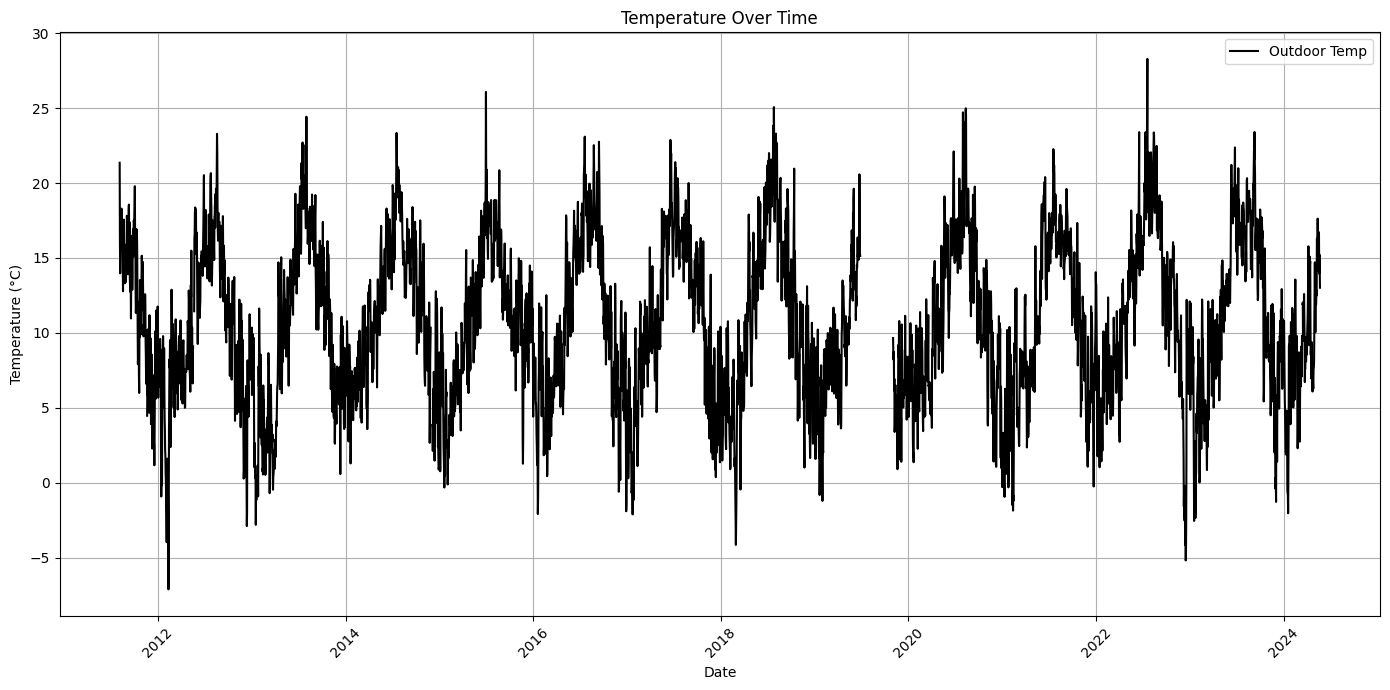

In [ ]:
# Plotting temperatures
plt.figure(figsize=(14, 7))
plt.plot(daily_weather_data['Datetime'], daily_weather_data['Temp'], label='Outdoor Temp', color='black', linestyle='-')

# Adding title and labels
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Monthly Average Temperature

In [ ]:
weather_data.reset_index(inplace=True)

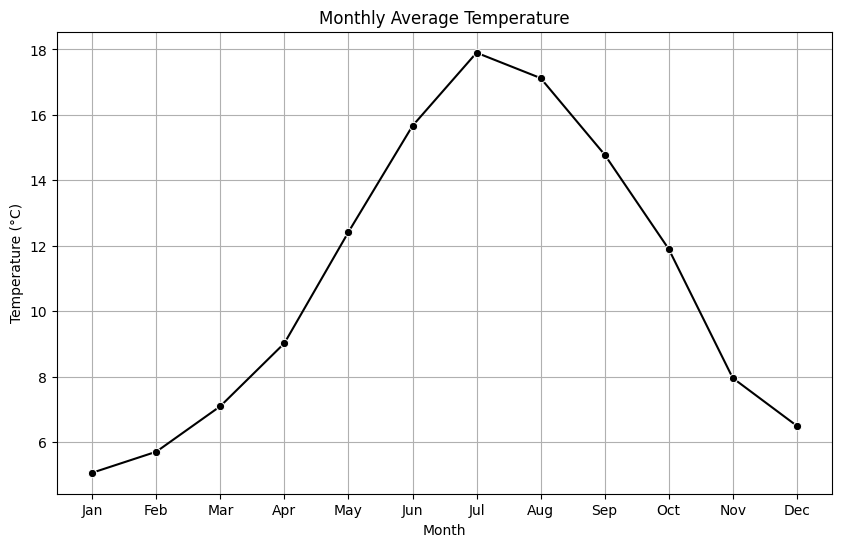

In [ ]:
weather_data['Month'] = weather_data['Datetime'].dt.month

monthly_avg_temp = weather_data.groupby('Month')['Temp'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values, color='black', marker='o')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


# Pre-processing

## Check Missing Values

In [ ]:
daily_weather_data.isna().sum()

,0
Datetime,0
Unnamed: 0,142
Wind Dir,142
Wind Spd,142
Hum In,142
Humidity,142
Temp In,142
Temp,142
Raw Barom,142
UV,142


## Removing Missing values and Visualizing it

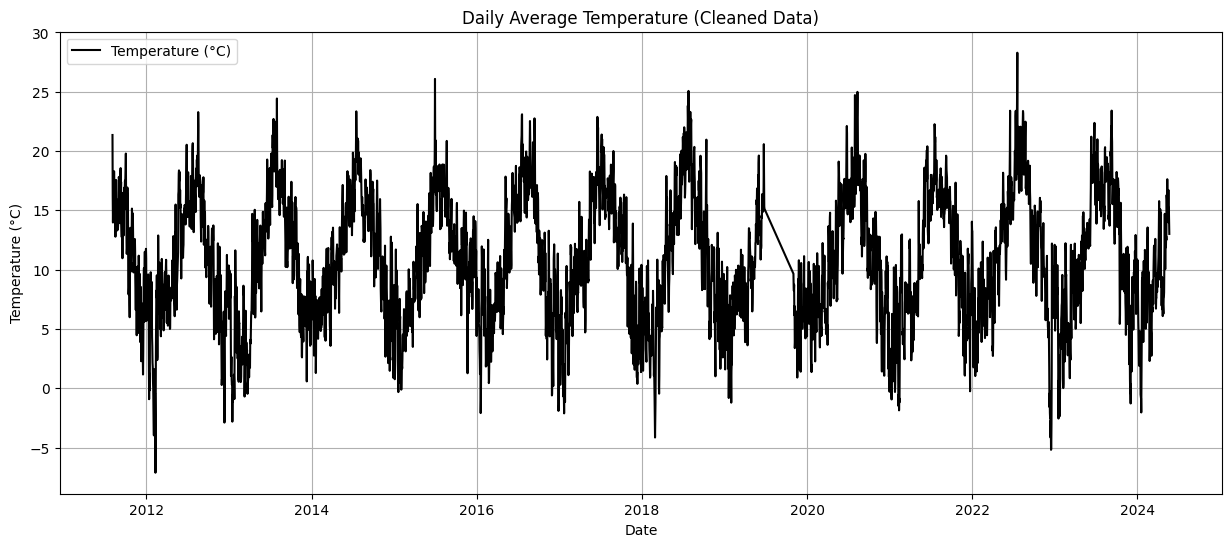

In [ ]:
# Remove rows with missing values
daily_weather_data_cleaned = daily_weather_data.dropna()

# Visualize the cleaned data for 'Temp'
plt.figure(figsize=(15, 6))
plt.plot(daily_weather_data_cleaned['Datetime'], daily_weather_data_cleaned['Temp'], label='Temperature (°C)', color='black')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature (Cleaned Data)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
